In [1]:
#分析问题：Aribnb产品的业务存在哪些可以改进的地方
#1.目标用户群体具有什么样的特征
#2.当前的推广渠道中有哪些是优质的，哪些做的不够好且需要改进的
#3.当前的转化率和流失率中哪个环节存在问题，或者有较大改进空间

In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei']

In [3]:
data=pd.read_csv('train_users_2.csv')
data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


# 数据清洗

### 重复值 缺失值处理

In [4]:
data.info()
# date_first_booking age first_affiliate_tracked含有缺失值
#date_first_booking 缺失可理解为此用户为“未预定用户”，也就是没有下单的用户
#age缺失是因为客户端这部分信息选填，用户未填，可以删除
#first_affiliate_tracked缺失是由于前端统计数据时未统计到，需要删除

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [5]:
data.drop_duplicates(keep='first',inplace=True)
data.dropna(axis=0,subset=['age','first_affiliate_tracked'],inplace=True)
data.reset_index(drop=True,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123429 entries, 0 to 123428
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       123429 non-null  object 
 1   date_account_created     123429 non-null  object 
 2   timestamp_first_active   123429 non-null  int64  
 3   date_first_booking       68171 non-null   object 
 4   gender                   123429 non-null  object 
 5   age                      123429 non-null  float64
 6   signup_method            123429 non-null  object 
 7   signup_flow              123429 non-null  int64  
 8   language                 123429 non-null  object 
 9   affiliate_channel        123429 non-null  object 
 10  affiliate_provider       123429 non-null  object 
 11  first_affiliate_tracked  123429 non-null  object 
 12  signup_app               123429 non-null  object 
 13  first_device_type        123429 non-null  object 
 14  firs

### 异常值处理

In [6]:
#发现年龄存在异常数值，可知是某些用户随意填写
data=data[(data['age']>=7) & (data['age']<=75)]
data.reset_index(drop=True,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120402 entries, 0 to 120401
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       120402 non-null  object 
 1   date_account_created     120402 non-null  object 
 2   timestamp_first_active   120402 non-null  int64  
 3   date_first_booking       66592 non-null   object 
 4   gender                   120402 non-null  object 
 5   age                      120402 non-null  float64
 6   signup_method            120402 non-null  object 
 7   signup_flow              120402 non-null  int64  
 8   language                 120402 non-null  object 
 9   affiliate_channel        120402 non-null  object 
 10  affiliate_provider       120402 non-null  object 
 11  first_affiliate_tracked  120402 non-null  object 
 12  signup_app               120402 non-null  object 
 13  first_device_type        120402 non-null  object 
 14  firs

# 目标用户群体具有什么样的特征

### 用户性别分布特征 用户年龄分布特征 用户地区分布特征 中国地区去国外预定的地区占比

<Axes: ylabel='gender'>

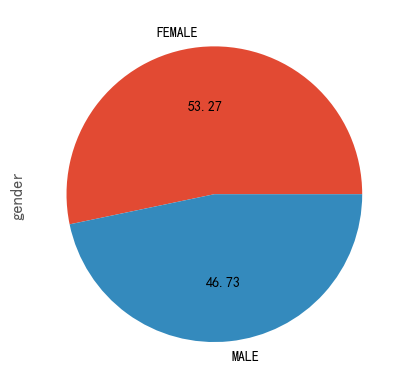

In [7]:
data['gender'].value_counts().head(2).plot.pie(autopct='%.2f')
#由可视化可以看出，男女用户占比差别不大，女性用户多余男性用户

<Axes: ylabel='Frequency'>

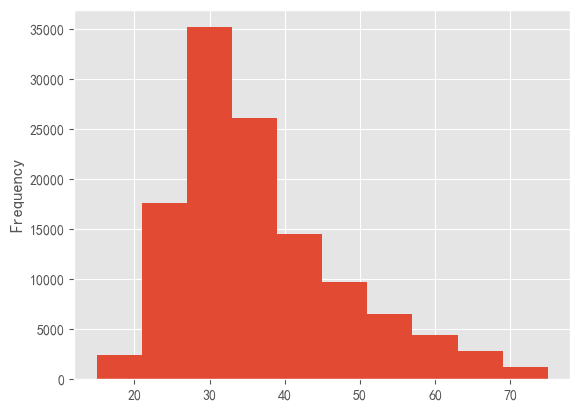

In [8]:
data['age'].plot.hist(bins=10)
#从直方图可以看出，用户主要为“中青年群体”，其中用户数量最多的是25-35，然后是35-40，然后为20-30岁

<Axes: >

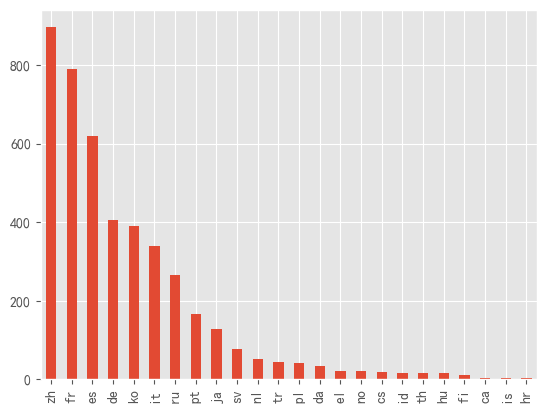

In [23]:
data['language'].value_counts()[1:].plot(kind='bar')
#英语国家占比远远高于其他国家，饼图和柱状图都不合适，因此删去英语国家进行可视化
#超过90%的用户是英语国家，airbnb是13年进入中国市场，此数据集截止于2014年，所以此时中文用户数量虽然排名第二，但是占比却非常小

<Axes: >

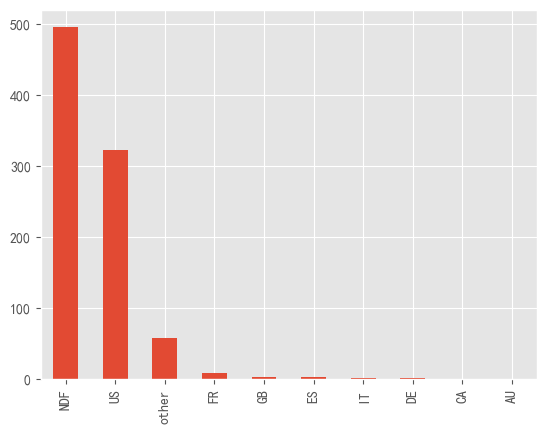

In [25]:
data[data['language']=='zh']['country_destination'].value_counts().plot(kind='bar')
#可以看出中国人去国外预定民宿主要集中在美国，然后是法国
#占比最多的是美国，其余国家占比很小，总和不到20%

# 当前的推广渠道中有哪些是优质的，哪些做的不够好且需要改进的

### 每月新增用户

<Axes: xlabel='month_account_created'>

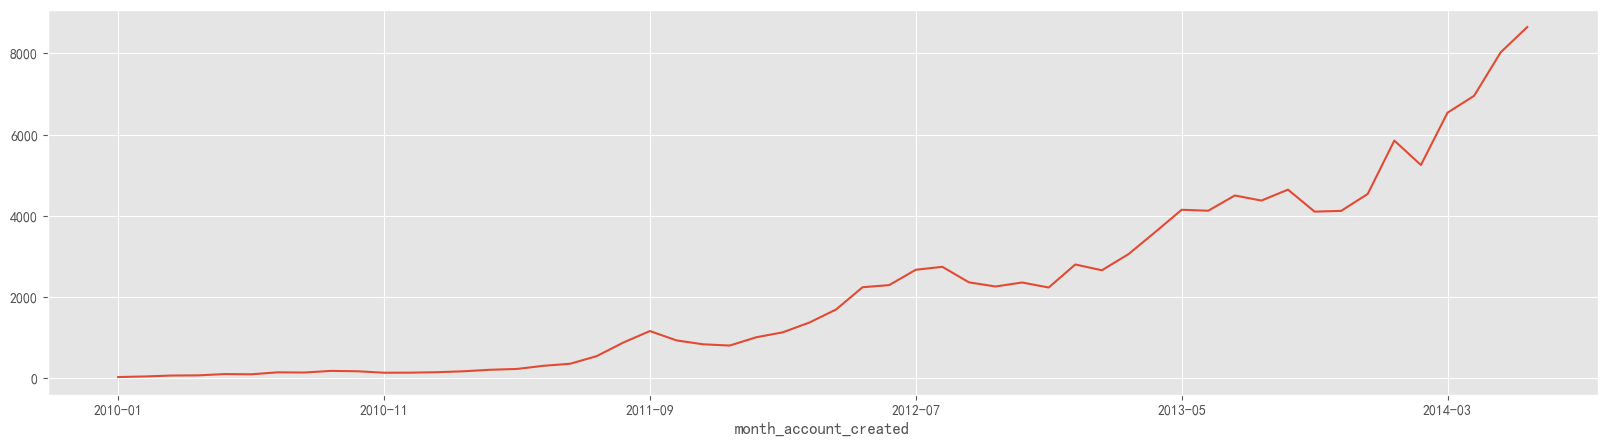

In [38]:
data['month_account_created']=pd.to_datetime(data['date_account_created']).dt.strftime('%Y-%m')
data.groupby('month_account_created')['id'].count().plot(figsize=(20,5))
#由可视化结果可以看出
#aribnb用户增长曲线健康，前期2011年之前平缓，2012年2月后开始快速增长
#2012年之后的增长速度很快
#此产品新用户的增加存在季节性规律，每年的7-10月，产品都会迎来用户增长的高峰，推测为夏季是北半球旅行旺季，而短租产品本身就是旅行消费的一种

### 不同用户端的注册数量

<Axes: >

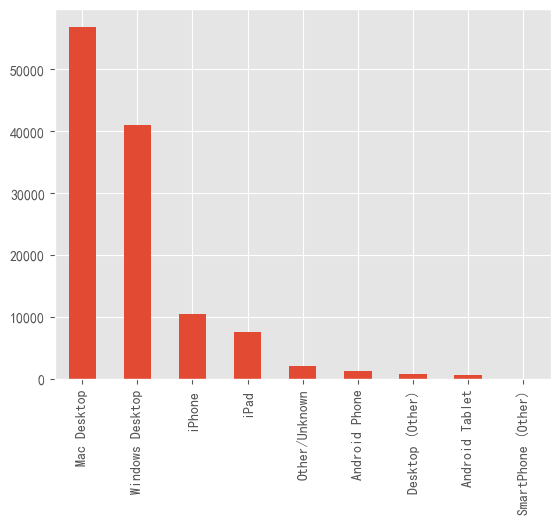

In [39]:
data['first_device_type'].value_counts().plot(kind='bar')
#PC设备中苹果多于Windows，移动设备中iPhone多于android
#此数据为2014年之前的数据，当时智能手机还没有像现在一样普及，用户的注册设备PC大于移动设备
#苹果设备数量大于其他设备数量

### 不同推广渠道的注册量和转化率

In [66]:
data1=data.groupby(['affiliate_channel','affiliate_provider'])['date_account_created','date_first_booking'].count()
data1['convert_rate']=data1['date_first_booking']/data1['date_account_created']
len(data1)
data1.describe()
##共36个渠道
#可以看出整体渠道转化率较好，渠道平均转化率在40%以上
#可以看出渠道平均注册用户数为3344，而75%分位数为719，远小于平均数，属于右偏分布，少部分渠道贡献了绝大多数用户

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10904\903955538.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data1=data.groupby(['affiliate_channel','affiliate_provider'])['date_account_created','date_first_booking'].count()


,date_account_created,date_first_booking,convert_rate
count,36.00000,36.000000,36.000000
mean,3344.50000,1849.777778,0.413195
std,13040.23246,7501.461500,0.219095
min,2.00000,0.000000,0.000000
25%,6.75000,3.000000,0.286759
50%,222.00000,103.000000,0.475791
75%,719.25000,279.250000,0.523336
max,77570.00000,44665.000000,1.000000


Text(0.5, 1.0, '各推广渠道的转化率')

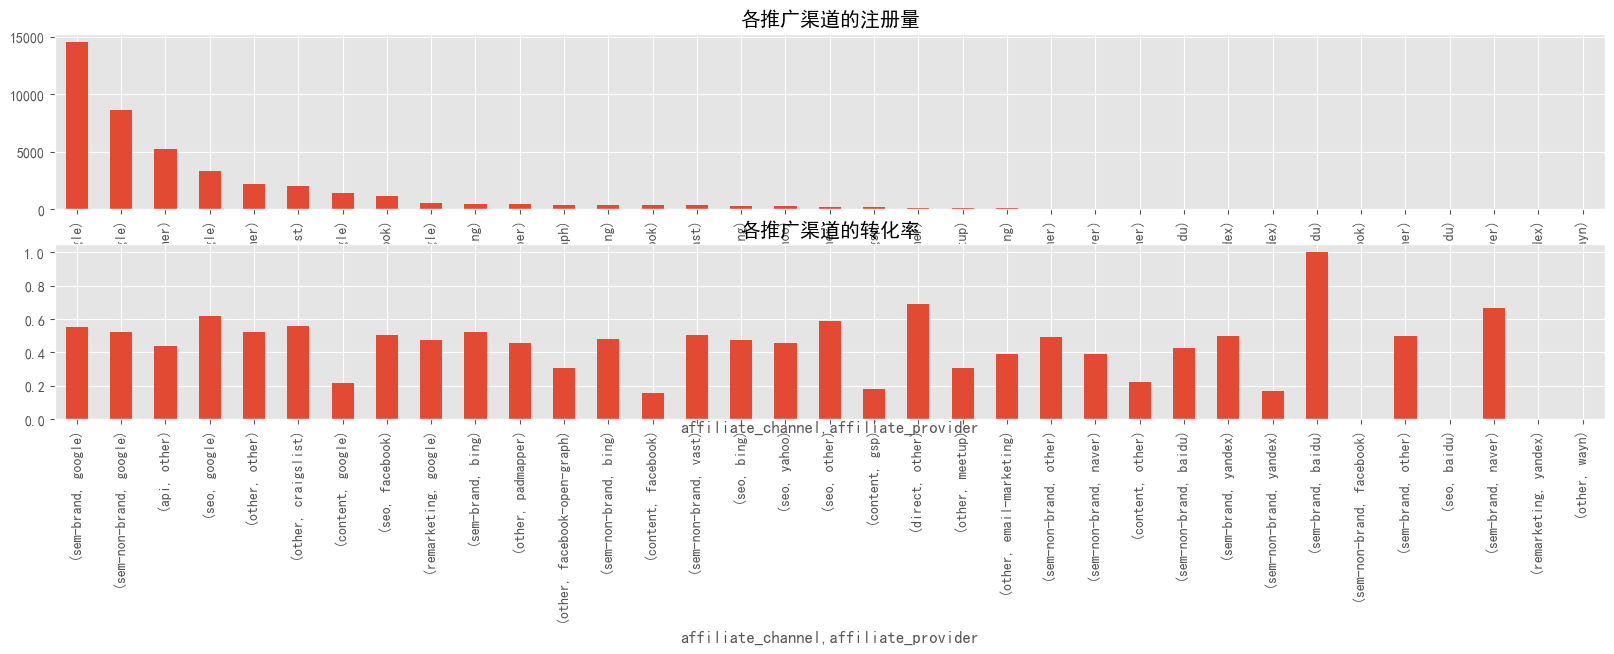

In [101]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
data1.sort_values(by='date_account_created',ascending=False)['date_account_created'][1:].plot(kind='bar',label='注册数')
plt.title('各推广渠道的注册量')
plt.subplot(2,1,2)
data1.sort_values(by='date_account_created',ascending=False)['convert_rate'][1:].plot(kind='bar',label='注册数')
plt.title('各推广渠道的转化率')
#可以发现content这一种推广方式各渠道转化率都很低
#优质渠道seo google的注册量和转化率均表现良好
#sem-brand-google的注册量 转化率也表现良好

Text(0.5, 1.0, '注册量前7推广渠道的转化率')

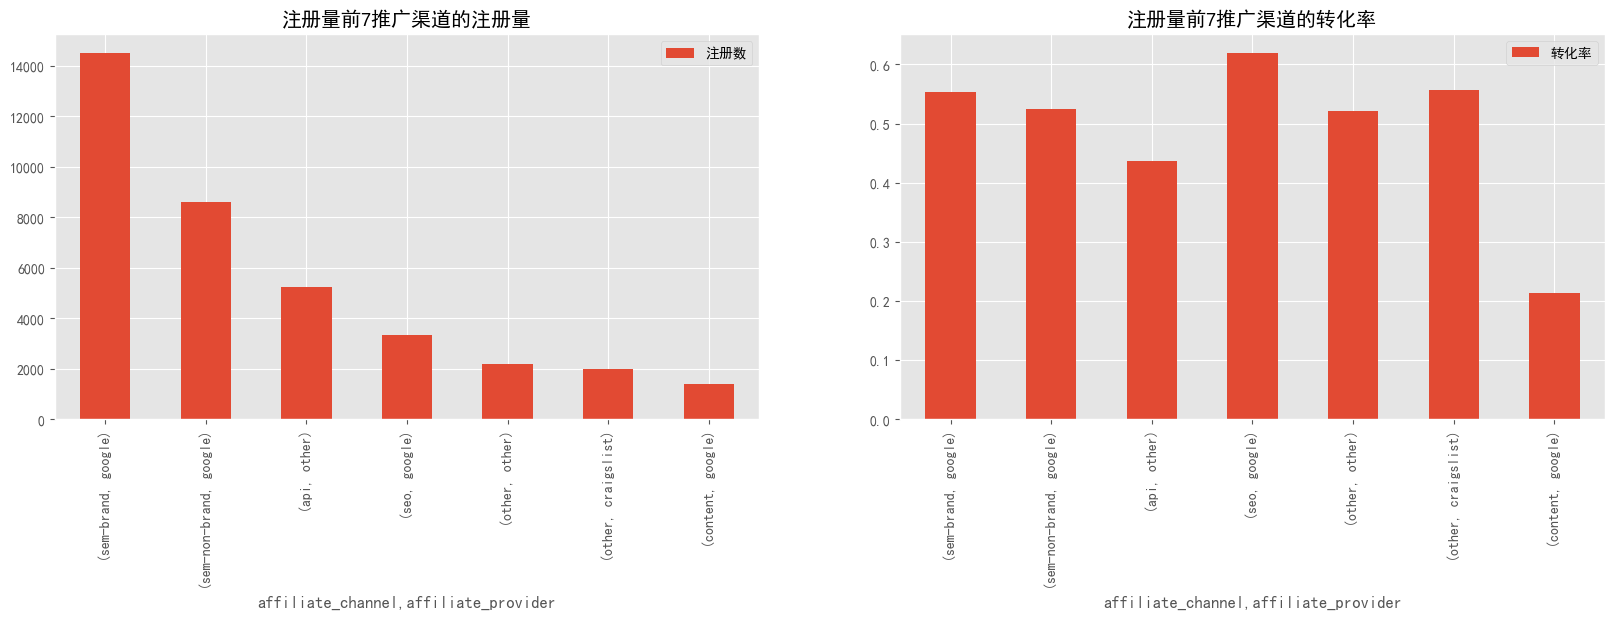

In [97]:
plt.figure(figsize=(20,5))
plt.subplot(121)
data1.sort_values(by='date_account_created',ascending=False)['date_account_created'][1:8].plot(kind='bar',label='注册数')
plt.legend()
plt.title('注册量前7推广渠道的注册量')

plt.subplot(122)
data1.sort_values(by='date_account_created',ascending=False)['convert_rate'][1:8].plot(kind='bar',label='转化率')
plt.legend()
plt.title('注册量前7推广渠道的转化率')
#direct的注册量最多，我们分析的目的是查看推广渠道的好坏，具体分析中排除direct
#选取除了direct的渠道前7进行可视化
#表现最好的是谷歌竞价SEM，其中品牌竞价注册量大于非品牌竞价注册量
#渠道转化率存在的问题
#content google的转化率异常，明显低于转化率平均值
#api other渠道的转化率虽然大于40%，但是相比较于其他渠道，转化率偏低

### 不同营销内容的注册量和转化率

<Axes: >

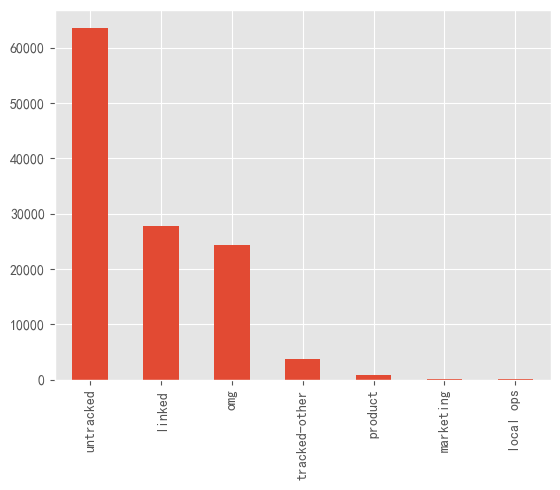

In [104]:
data['first_affiliate_tracked'].value_counts().plot(kind='bar')
#可以看出注册量排名第一的营销内容为untracted，产品的数据跟踪异常
#从统计到的数据来看，linked的注册量位居第一。

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10904\1829116216.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data2=data.groupby('first_affiliate_tracked')['date_account_created','date_first_booking'].count()


<Axes: xlabel='first_affiliate_tracked'>

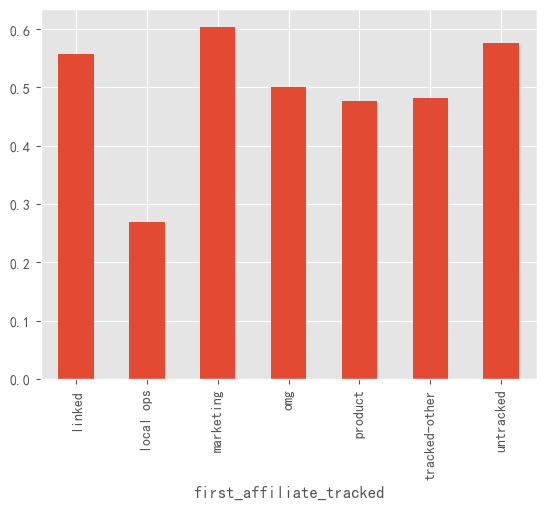

In [109]:
data2=data.groupby('first_affiliate_tracked')['date_account_created','date_first_booking'].count()
data2['covert_rate']=data2['date_first_booking']/data2['date_account_created']
data2['covert_rate'].plot(kind='bar')
#从转化率角度可以看出marketing和linked的转化率较好，在50%以上，local ops的转化率非常低

# 当前的转化率和流失率中哪个环节存在问题，或者有较大改进空间

### 活跃用户占比 注册用户占比 下单用户占比 实际支付用户占比 复购用户占比

In [118]:
#由于用到了新的表格，依然进行数据清洗 存在重复记录不需要处理
df=pd.read_csv('sessions.csv')
df

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [121]:
df.drop_duplicates(keep='first').reset_index()
#可以看出共有用户数10315201，为了避免多次操作，后续计算中用这个常数

,index,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...,...
10315196,10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10315197,10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10315198,10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10315199,10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [123]:
len(df['user_id'].value_counts().apply(lambda x: x>=10))
#按照用户操作次数，如果用户操作次数大于等于10次，则视为活跃用户数，可以看出活跃用户数为135483，

135483

In [136]:
df['user_id'].apply(lambda x: x in data['id'].tolist())

KeyboardInterrupt: 

In [139]:
df[df['action_detail']=='reservations'].drop_duplicates(keep='first')
#下单用户数有32076个

,user_id,action,action_type,action_detail,device_type,secs_elapsed
111963,pug5921h1b,index,data,reservations,iPhone,14162.0
111972,pug5921h1b,index,data,reservations,iPhone,9547.0
111979,pug5921h1b,index,data,reservations,iPhone,490.0
111981,pug5921h1b,index,data,reservations,iPhone,14080.0
111991,pug5921h1b,index,data,reservations,iPhone,6354.0
...,...,...,...,...,...,...
10559350,ltd8uvna4h,index,data,reservations,iPhone,9792.0
10559749,0wai4cjyn0,index,data,reservations,iPhone,9.0
10560175,4vx0ysgds3,index,data,reservations,iPhone,9303.0
10561778,tvyyjfaqet,index,data,reservations,iPhone,19.0


In [148]:
df[df['action_detail']=='payment_instruments'].drop_duplicates(keep='first')
#实际支付用户数有23339个

,user_id,action,action_type,action_detail,device_type,secs_elapsed
114525,q83d1akfql,payment_instruments,data,payment_instruments,iPad Tablet,1.0
116971,xzulq9d96w,payment_instruments,data,payment_instruments,iPhone,8.0
116975,xzulq9d96w,payment_instruments,data,payment_instruments,iPhone,6788.0
124828,37p6yvgtst,payment_instruments,data,payment_instruments,-unknown-,93652.0
127030,tr5j6nmvs9,payment_instruments,data,payment_instruments,iPhone,61.0
...,...,...,...,...,...,...
10566586,ozb2z0km6l,payment_instruments,data,payment_instruments,Android Phone,4202.0
10566604,ozb2z0km6l,payment_instruments,data,payment_instruments,Android Phone,4808.0
10567082,f9a1ncjnrg,payment_instruments,data,payment_instruments,Android Phone,40978.0
10567098,f9a1ncjnrg,payment_instruments,data,payment_instruments,Android Phone,11270.0


In [151]:
data3=df[df['action_detail']=='reservations'].groupby('user_id').count()
data3[data3['action']>=2]
#复购用户数有5446个

,action,action_type,action_detail,device_type,secs_elapsed
user_id,,,,,
002qnbzfs5,20,20,20,20,20
00urnt6rg8,11,11,11,11,11
01exzqnc72,9,9,9,9,9
01lepjs4ob,2,2,2,2,2
01r1jwa1bt,2,2,2,2,2
...,...,...,...,...,...
zye2pv0vx7,4,4,4,4,4
zyzm3n3hzj,4,4,4,4,4
zz5st3bekq,2,2,2,2,2


In [159]:
#至此共统计出总用户10315201 活跃用户135483 注册用户？？？（73815） 下单用户32076 实际支付用户23339 复购用户5446
data=[['总用户',10315201],['活跃用户',135483],['注册用户',73815],['下单用户',32076],['实际支付用户',23339],['复购用户',5446]]
data4=pd.DataFrame(data,columns=['用户类型','用户数量'])

In [176]:
data4['占比']=data4['用户数量']/data4['用户数量'].max()
data4['转化率']=data4['用户数量']/data4['用户数量'].shift()
#data4.set_index('用户类型', inplace=True)

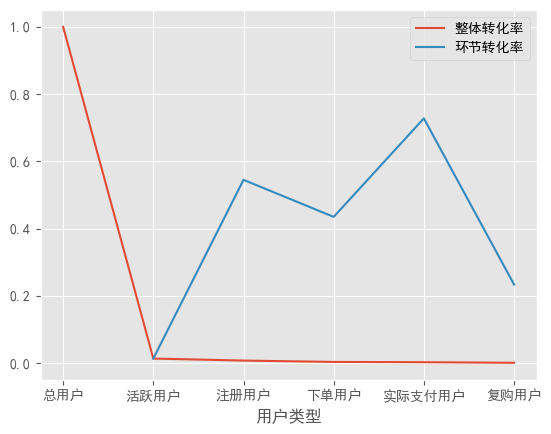

In [177]:
data4['占比'].plot(label='整体转化率')
data4['转化率'].plot(label='环节转化率')
plt.legend()

In [178]:
#可以看出第一环节转化率很低，总用户中只有1%的用户转化为活跃用户
#注册用户-下单用户以及实际支付用户-复购用户两个环节内转化率较低
data4

,用户数量,占比,转化率
用户类型,,,
总用户,10315201,1.000000,NaN
活跃用户,135483,0.013134,0.013134
注册用户,73815,0.007156,0.544829
下单用户,32076,0.003110,0.434546
实际支付用户,23339,0.002263,0.727616
复购用户,5446,0.000528,0.233343
